The exploratory data analysis of Houston's temperature data from 1973 to 2020 to see if there shifts in the observed data over time, that cannot be explained by seasonality.

In [250]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore') # suppresses messages and warnings

## Houston Weather Data - 1973 to 2019

The hourly climatological data for Houston's Intercontinental Airport, covering the Years 1973 - 2019, was obtained from the National Oceanic and Atmospheric Administration (NOAA) Local Climatological Data site:  
https://www.ncdc.noaa.gov/cdo-web/datatools/lcd.

The data was filtered to extract the Dry-Bulb and Dew-Point temperatures.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [252]:
hou = pd.read_csv('HouTPW.csv', index_col='DATE',parse_dates=True)
hou = hou.loc[:,['HourlyDryBulbTemperature']]
hou.columns = ['DryBulbTemperature']
hou.index.name = 'Date'
hou = hou.loc[:'2019']
hou

,DryBulbTemperature
Date,
1973-01-01 00:00:00,53
1973-01-01 01:00:00,52
1973-01-01 02:00:00,52
1973-01-01 03:00:00,52
1973-01-01 04:00:00,52
...,...
2019-12-31 19:53:00,49
2019-12-31 20:53:00,47
2019-12-31 21:53:00,46


In [253]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578567 entries, 1973-01-01 00:00:00 to 2019-12-31 23:53:00
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DryBulbTemperature  483326 non-null  object
dtypes: object(1)
memory usage: 8.8+ MB


### Data Preprocessing

Data that has the letter "s" appearing after the value are designated as suspect values, per the NOAA data documentation. 
Listed below are the number of suspect values in the temperature variable:

In [254]:
np.sum(hou.DryBulbTemperature.str.contains("s",na=False))

124

This temperature data also contains the string "*"

In [255]:
np.sum(hou.DryBulbTemperature.str.contains("\*",na=False)) #  \ is placed before * to escape term, otherwise it is interpreted as regex metacharacters

6

These suspect values will be removed from the dataset.  

In [256]:
hou=hou[~hou.DryBulbTemperature.str.contains("s|\*", na=False)] 

In [257]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578437 entries, 1973-01-01 00:00:00 to 2019-12-31 23:53:00
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DryBulbTemperature  483196 non-null  object
dtypes: object(1)
memory usage: 8.8+ MB


The values in the dataframe are all strings, hence must be converted to numeric values.

In [258]:
hou['DryBulbTemperature'] = pd.to_numeric(hou['DryBulbTemperature'])

In [259]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578437 entries, 1973-01-01 00:00:00 to 2019-12-31 23:53:00
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DryBulbTemperature  483196 non-null  float64
dtypes: float64(1)
memory usage: 8.8 MB


Any rows with missing values are dropped from the dataset. But here it seems like the temperature data does not contain any missing values.

In [260]:
hou = hou.dropna()
hou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483196 entries, 1973-01-01 00:00:00 to 2019-12-31 23:53:00
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DryBulbTemperature  483196 non-null  float64
dtypes: float64(1)
memory usage: 7.4 MB


## Exploratory Data Analysis

**“Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.” —John Tukey**

### Daily Maximum Temperatures

Plot below suggests an increasing temperature trend over time.

In [261]:
houMaxT = hou['DryBulbTemperature'].resample('D').max()
houMaxT = pd.DataFrame(houMaxT)

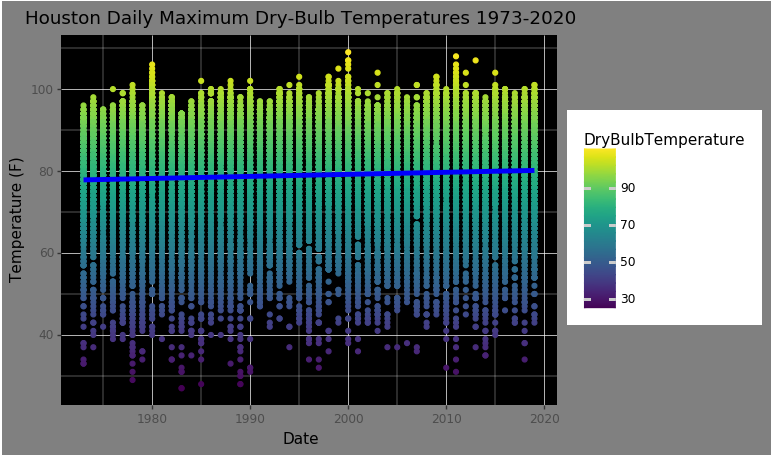

<ggplot: (-9223371856758492756)>

In [262]:
from plotnine import *
%matplotlib inline

(ggplot(houMaxT)
 + aes(x='houMaxT.index.year', y='DryBulbTemperature', color='DryBulbTemperature')
 + geom_point() 
 + labs(title='Houston Daily Maximum Dry-Bulb Temperatures 1973-2020', x='Date', y='Temperature (F)')
 + geom_smooth(size=2,color="blue")
 + theme(panel_grid_major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
         panel_grid_minor = element_line(size = 0.25, linetype = 'solid',colour = "white"),
         plot_background=element_rect(fill = "gray"),panel_background = element_rect(fill = 'black')
))

### Daily Minimum Temperatures

Plot below suggests an increasing temperature trend over time.

In [263]:
houMinT = hou['DryBulbTemperature'].resample('D').min()
houMinT = pd.DataFrame(houMinT)

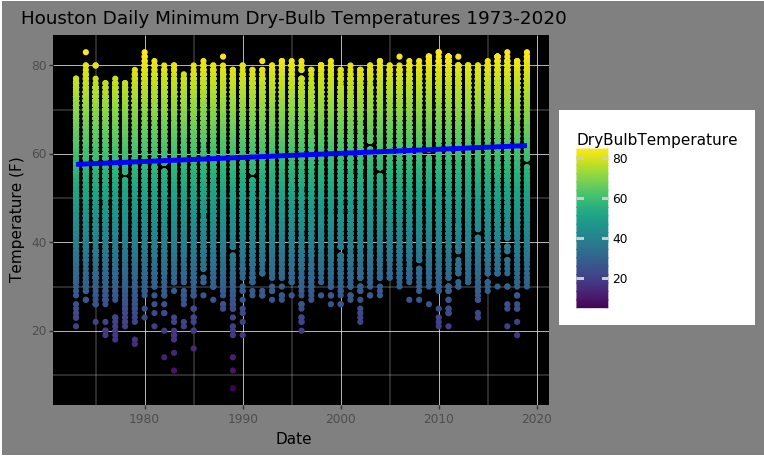

<ggplot: (-9223371856758497897)>

In [264]:
(ggplot(houMinT)
 + aes(x='houMinT.index.year', y='DryBulbTemperature', color='DryBulbTemperature')
 + geom_point() 
 + labs(title='Houston Daily Minimum Dry-Bulb Temperatures 1973-2020', x='Date', y='Temperature (F)')
 + geom_smooth(size=2,color="blue")
 + theme(panel_grid_major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
         panel_grid_minor = element_line(size = 0.25, linetype = 'solid',colour = "white"),
         plot_background=element_rect(fill = "gray"),panel_background = element_rect(fill = 'black')
))

###  Daily Temperature Range

In [265]:
houDT = houMaxT-houMinT
houDT.columns = ['Tmax-Tmin']

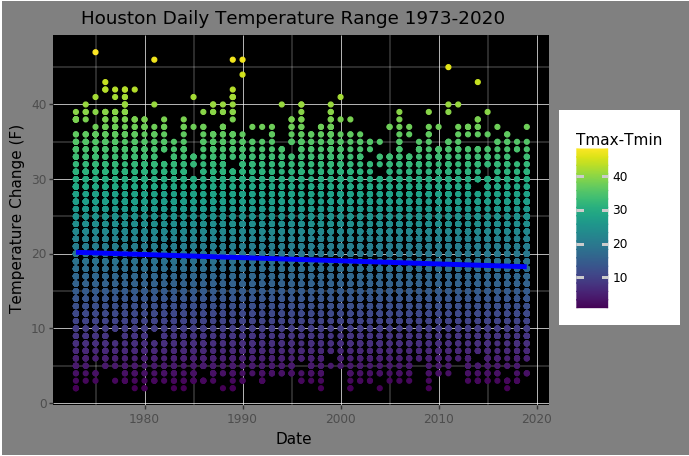

<ggplot: (180099244969)>

In [266]:
(ggplot(houDT)
 + aes(x='houDT.index.year', y='Tmax-Tmin', color='Tmax-Tmin')
 + geom_point() 
 + labs(title='Houston Daily Temperature Range 1973-2020', x='Date', y='Temperature Change (F)')
 + geom_smooth(size=2,color="blue")
 + theme(panel_grid_major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
         panel_grid_minor = element_line(size = 0.25, linetype = 'solid',colour = "white"),
         plot_background=element_rect(fill = "gray"),panel_background = element_rect(fill = 'black')
))

 ### Variations of  Mean Monthly Temperatures over Time

In [267]:
houMon = hou['DryBulbTemperature'].resample('M').mean()

#### Winter Months

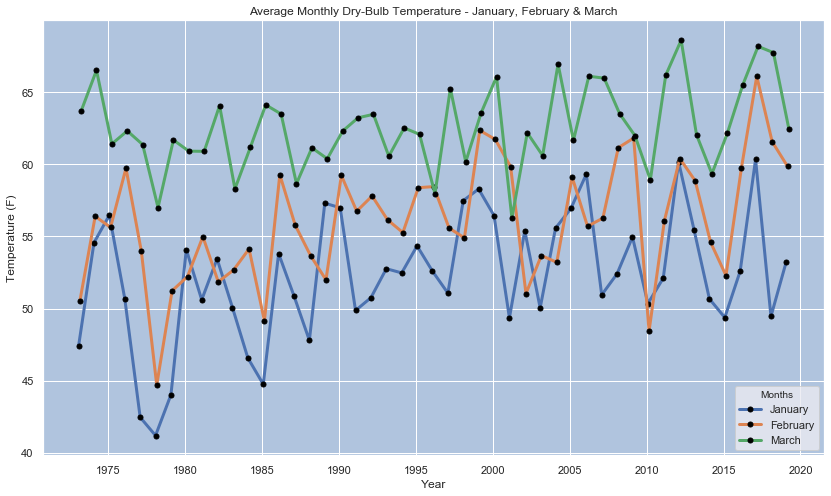

In [268]:
_= plt.figure(figsize=(14,8))
ax = plt.axes()
ax.set_facecolor('lightsteelblue')
for i in range(1,4):
    _=plt.plot(houMon[houMon.index.month==i].index,houMon[houMon.index.month==i],label=i,linewidth=3,
              marker='o',markersize=5,markerfacecolor='black',
         markeredgecolor='black')

_= plt.title("Average Monthly Dry-Bulb Temperature - January, February & March")
_= plt.xlabel('Year')
_= plt.ylabel('Temperature (F)')

labels = ['January', 'February', 'March']
_=plt.legend(labels,title="Months",loc=4)
plt.show()    

#### Spring Months

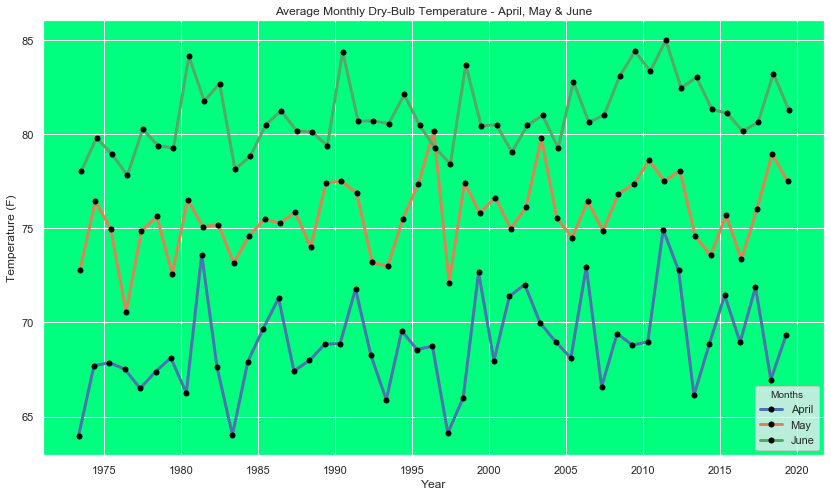

In [269]:
_= plt.figure(figsize=(14,8))
ax = plt.axes()
ax.set_facecolor('springgreen')
for i in range(4,7):
    _=plt.plot(houMon[houMon.index.month==i].index,houMon[houMon.index.month==i],label=i,linewidth=3,
              marker='o',markersize=5,markerfacecolor='black',
         markeredgecolor='black')

_= plt.title("Average Monthly Dry-Bulb Temperature - April, May & June")
_= plt.xlabel('Year')
_= plt.ylabel('Temperature (F)')

labels = ['April', 'May', 'June']
_=plt.legend(labels,title="Months",loc=4)
plt.show()    

#### Summer Months

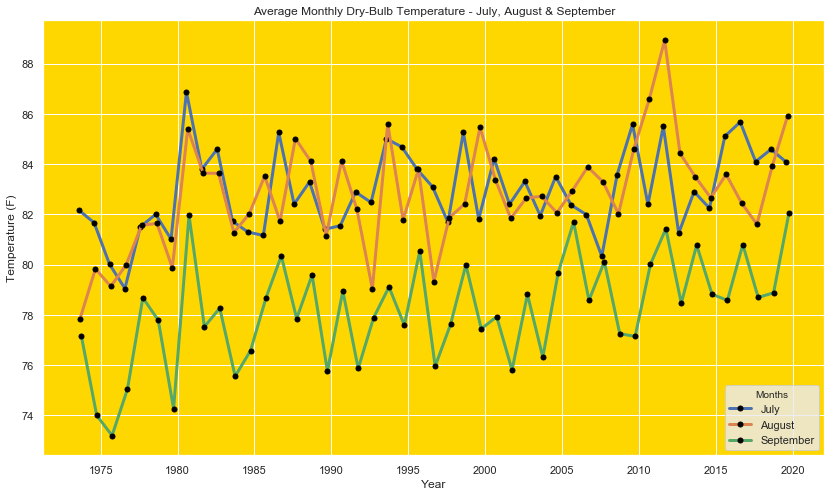

In [270]:
_= plt.figure(figsize=(14,8))
ax = plt.axes()
ax.set_facecolor('gold')
for i in range(7,10):
    _=plt.plot(houMon[houMon.index.month==i].index,houMon[houMon.index.month==i],label=i,linewidth=3,
              marker='o',markersize=5,markerfacecolor='black',
         markeredgecolor='black')

_= plt.title("Average Monthly Dry-Bulb Temperature - July, August & September")
_= plt.xlabel('Year')
_= plt.ylabel('Temperature (F)')

labels = ['July', 'August', 'September']
_=plt.legend(labels,title="Months",loc=4)
plt.show()    

#### Fall Months

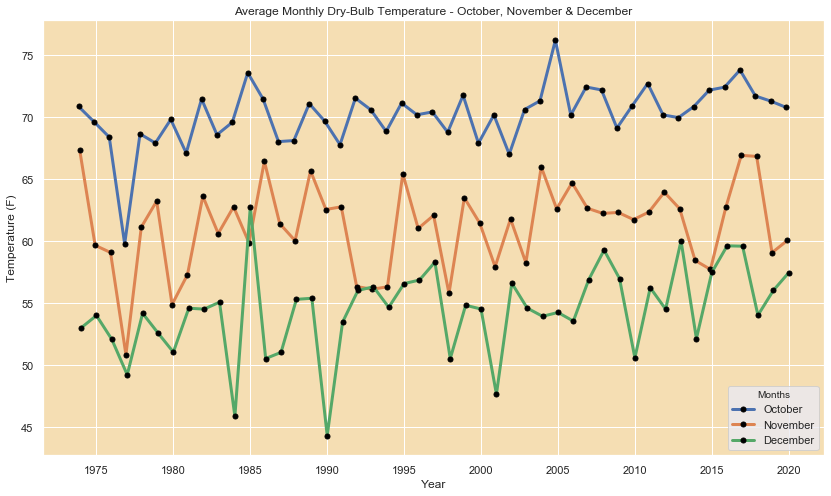

In [271]:
_= plt.figure(figsize=(14,8))
ax = plt.axes()
ax.set_facecolor('wheat')
for i in range(10,13):
    _=plt.plot(houMon[houMon.index.month==i].index,houMon[houMon.index.month==i],label=i,linewidth=3,
              marker='o',markersize=5,markerfacecolor='black',
         markeredgecolor='black')

_= plt.title("Average Monthly Dry-Bulb Temperature - October, November & December")
_= plt.xlabel('Year')
_= plt.ylabel('Temperature (F)')

labels = ['October', 'November', 'December']
_=plt.legend(labels,title="Months",loc=4)
plt.show()    

### Variations of Temperatures at Decadal  Intervals

In [272]:
def decades(df):
    '''A function to subset temp data by decades'''
    the1970s = df.loc['1973':'1979','DryBulbTemperature']
    the1980s = df.loc['1980':'1989','DryBulbTemperature']
    the1990s = df.loc['1990':'1999','DryBulbTemperature']
    the2000s = df.loc['2000':'2009','DryBulbTemperature']
    the2010s = df.loc['2010':'2019','DryBulbTemperature']
    temps=[the1970s,the1980s,the1990s,the2000s,the2010s]
    label=['the1970s','the1980s','the1990s','the2000s','the2010s']
    
    return temps, label

#### Maximum Daily Temperature Decadal Variations

In [273]:
# subset max daily temp data by decades
temps, label = decades(houMaxT)

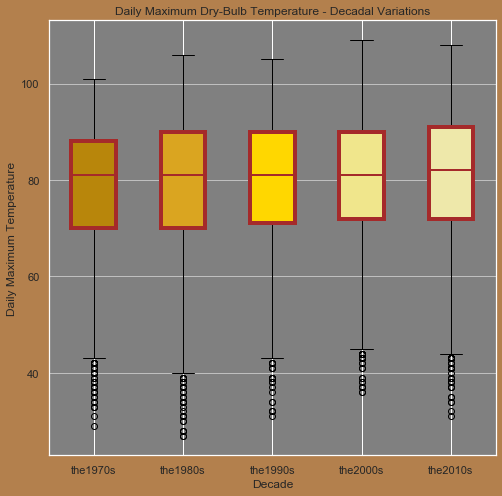

In [274]:
_= plt.figure(figsize=(8,8),facecolor=(.7,.5,.3))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")

boxprops = dict(linestyle='-', linewidth=4, color='brown')
medianprops = dict(linestyle='-', linewidth=2, color='brown')
box=plt.boxplot(temps, vert=True, patch_artist=True, labels=label,boxprops=boxprops,medianprops=medianprops)
_= plt.grid(axis='y',linewidth=0.5, color='white', linestyle='-')
_= plt.xlabel('Decade')
_= plt.ylabel('Daily Maximum Temperature')
_= plt.title('Daily Maximum Dry-Bulb Temperature - Decadal Variations')
colors = ['darkgoldenrod', 'goldenrod', 'gold', 'khaki','palegoldenrod']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [275]:
# Daily max temperature medians & means by decades
la=[lab for lab in label]
teMD=[np.median(t) for t in temps]
teMN=[round(np.mean(t),1) for t in temps]
maxT=pd.DataFrame(list(zip(teMD,teMN)),columns=['Median Daily Max Temp','Mean Daily Max Temp'],index=la)
maxT

,Median Daily Max Temp,Mean Daily Max Temp
the1970s,81.0,77.7
the1980s,81.0,78.5
the1990s,81.0,79.2
the2000s,81.0,79.2
the2010s,82.0,79.9


#### Minimum Daily Temperature Decadal Variations

In [276]:
# subset min daily temp data by decades
temps, label = decades(houMinT)

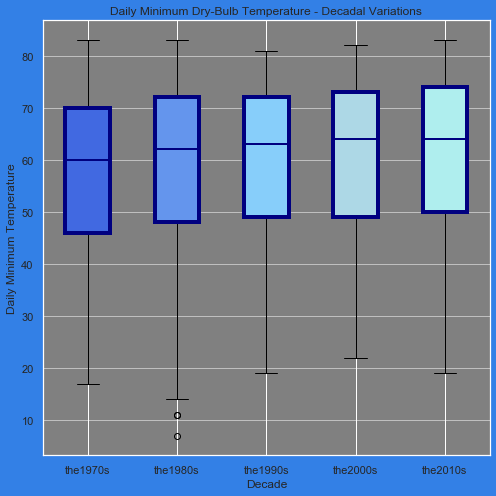

In [277]:
_= plt.figure(figsize=(8,8),facecolor=(.2,.5,.9))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")

boxprops = dict(linestyle='-', linewidth=4, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='navy')
box=plt.boxplot(temps, vert=True, patch_artist=True, labels=label,boxprops=boxprops,medianprops=medianprops)
_= plt.grid(axis='y',linewidth=0.5, color='white', linestyle='-')
_= plt.xlabel('Decade')
_= plt.ylabel('Daily Minimum Temperature')
_= plt.title('Daily Minimum Dry-Bulb Temperature - Decadal Variations')
colors = ['royalblue', 'cornflowerblue', 'lightskyblue', 'lightblue','paleturquoise']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [278]:
# Daily min temperature medians & means by decades
la=[lab for lab in label]
teMD=[np.median(t) for t in temps]
teMN=[round(np.mean(t),1) for t in temps]
minT = pd.DataFrame(list(zip(teMD,teMN)),columns=['Median Daily Min Temp','Mean Daily Min Temp'],index=la)
minT

,Median Daily Min Temp,Mean Daily Min Temp
the1970s,60.0,57.1
the1980s,62.0,59.2
the1990s,63.0,59.9
the2000s,64.0,60.5
the2010s,64.0,61.4


#### Daily Temperature Decadal Range Variations

In [279]:
# Combine the Daily Max and Min statistics into a single dataframe
rangeT = pd.concat([maxT,minT],axis=1)
rangeT['Mean Daily Temp Variation'] = rangeT['Mean Daily Max Temp'] - rangeT['Mean Daily Min Temp']
rangeT

,Median Daily Max Temp,Mean Daily Max Temp,Median Daily Min Temp,Mean Daily Min Temp,Mean Daily Temp Variation
the1970s,81.0,77.7,60.0,57.1,20.6
the1980s,81.0,78.5,62.0,59.2,19.3
the1990s,81.0,79.2,63.0,59.9,19.3
the2000s,81.0,79.2,64.0,60.5,18.7
the2010s,82.0,79.9,64.0,61.4,18.5


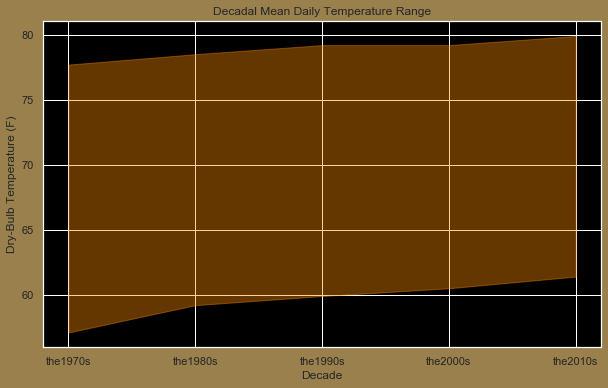

In [280]:
_= plt.figure(figsize=(10,6),facecolor=(.6,.5,.3))
# Setting the background color
ax = plt.axes()
ax.set_facecolor("black")
_= plt.fill_between(rangeT.index, rangeT['Mean Daily Max Temp'],rangeT['Mean Daily Min Temp'], color='darkorange',alpha=0.4)
_= plt.title('Decadal Mean Daily Temperature Range')
_= plt.xlabel('Decade')
_= plt.ylabel('Dry-Bulb Temperature (F)')
plt.show()